#Trabalho 2
##Resolução Numérica de Sistemas Lineares
###Enzo Massaki Ito, Juan Silva Fervenza, Odete Lara Melo Budtinger

####Exercício 1:
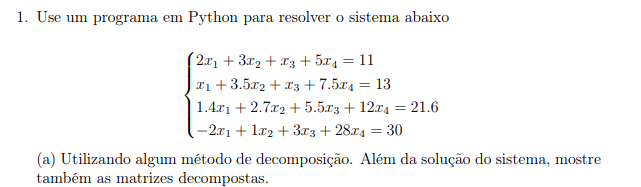

In [ ]:
import numpy as np

def fatora_LU(A):
    n = len(A)
    U = np.zeros((n,n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m,n):
            U[m,j] = A[m,j] - np.sum(L[m, 0:m]*U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m]-np.sum(L[i, 0:m]*U[0:m, m]))/U[m,m]
    return L, U  


def solve_L(L,b):
  x=np.copy(b)
  for i in range(len(b)):
    x[i]=(b[i]- sum(L[i,0:i]*x[0:i]))/L[i,i] 
  return x

def solve_U(U,b):
    n=len(b)
    x = np.copy(b)
    for i in range(n-1, -1, -1):
      x[i] = (b[i] - np.sum(U[i,i+1:n+1]*x[i+1:n+1]))/U[i,i]
    return x

In [ ]:
A=np.array([[2.0,3.0,1.0,5.0],
            [1.0,3.5,1.0,7.5],
            [1.4,2.7,5.5,12.0],
            [-2.0,1.0,3.0,28.0]])
B=np.array([11.0,13.0,21.6,30.0])
L,U=fatora_LU(A)
print("A matriz L é:")
print(L)
print("A matriz U é:")
print(U)
y = solve_L(L,B)
x = solve_U(U, y)
print("A solução do sistema é ", x)

A matriz L é:
[[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.7         0.3         1.          0.        ]
 [-1.          2.          0.64516129  1.        ]]
A matriz U é:
[[ 2.          3.          1.          5.        ]
 [ 0.          2.          0.5         5.        ]
 [ 0.          0.          4.65        7.        ]
 [ 0.          0.          0.         18.48387097]]
A solução do sistema é  [1. 1. 1. 1.]


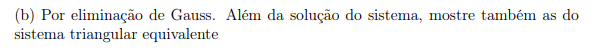

In [ ]:
import numpy as np
from numpy import dot
def gaussElimin(a,b): 
    n = len(b) 
    for k in range(0,n-1): 
        for i in range(k+1,n): 
            if a[i][k] != 0.0: 
                lam = a [i][k]/a[k][k] 
                a[i][k+1:n] = a[i][k+1:n] - lam*a[k][k+1:n] 
                b[i] = b[i] - lam*b[k] 
    for k in range(n-1,-1,-1): 
        b[k] = (b[k] - dot(a[k][k+1:n],b[k+1:n]))/a[k][k] 
    return b

In [ ]:
B=np.array([11.0,13.0,21.6,30.0])
print (gaussElimin(A,B))

[1. 1. 1. 1.]


Sistema triangular superior equivalente:


> Bloco com recuo



In [ ]:
import numpy as np

def triangulariza(M):
    n = len(M)
    for k in range(n-1):
        for i in range(k,n-1):
            m = M[i+1,k]/M[k,k]
            M[i+1] = M[i+1]-m*M[k]
    return (M)

In [ ]:
M=np.array([[2.0,3.0,1.0,5.0],
            [1.0,3.5,1.0,7.5],
            [1.4,2.7,5.5,12.0],
            [-2.0,1.0,3.0,28.0]])
M = triangulariza(M)
print("A matriz triangular equivalente ao sistema é:")
print(M)

A matriz triangular equivalente ao sistema é:
[[ 2.          3.          1.          5.        ]
 [ 0.          2.          0.5         5.        ]
 [ 0.          0.          4.65        7.        ]
 [ 0.          0.          0.         18.48387097]]


In [ ]:
def solve_U(U,b):
    n=len(b)
    x = np.copy(b)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.sum(U[i,i+1:n+1]*x[i+1:n+1]))/U[i,i]
    return x



In [ ]:
B=np.array([11.0,13.0,21.6,30.0]) 
print (solve_U(M,B))

[-2.49643923  1.8919383   2.20188031  1.62303665]


Aqui coloquei a matriz ampliada, não entendi muito bem




In [ ]:
M=np.array([[2.0,3.0,1.0,5.0,11.0],
            [1.0,3.5,1.0,7.5,13.0],
            [1.4,2.7,5.5,12.0,21.6],
            [-2.0,1.0,3.0,28.0,30.0]]) 
M = triangulariza(M)
print("A matriz triangular equivalente ao sistema é:")
print(M)

A matriz triangular equivalente ao sistema é:
[[ 2.          3.          1.          5.         11.        ]
 [ 0.          2.          0.5         5.          7.5       ]
 [ 0.          0.          4.65        7.         11.65      ]
 [ 0.          0.          0.         18.48387097 18.48387097]]


In [ ]:
n = len(M)
B = M[0:n+1,n:n+1]       
A = M[0:n+1,0:n]  
print (A)
print (B)

[[ 2.          3.          1.          5.        ]
 [ 0.          2.          0.5         5.        ]
 [ 0.          0.          4.65        7.        ]
 [ 0.          0.          0.         18.48387097]]
[[11.        ]
 [ 7.5       ]
 [11.65      ]
 [18.48387097]]


In [ ]:
def solve_U(U,b):
    n=len(b)
    x = np.copy(b)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.sum(U[i,i+1:n+1]*x[i+1:n+1]))/U[i,i]
    return x

print (solve_U(A,B))

[[ 4.375]
 [-1.75 ]
 [ 1.   ]
 [ 1.   ]]


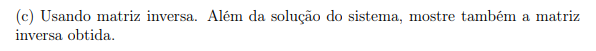

Encontrando a matriz inversa:

In [ ]:
import numpy as np
def gaussJordan(M):
    n = len(M)
    for k in range(n):
        M[k] = M[k]/M[k,k]
        for i in range(n):
            if i!=k:
                M[i] = M[i] - M[i,k]*M[k]
    return (M)

A=np.array([[2.0,3.0,1.0,5.0],
            [1.0,3.5,1.0,7.5],
            [1.4,2.7,5.5,12.0],
            [-2.0,1.0,3.0,28.0]])
B=np.array([11.0,13.0,21.6,30.0])
I = np.identity(len(A))
M = np.concatenate((A,I), axis=1)
print (M)

[[ 2.   3.   1.   5.   1.   0.   0.   0. ]
 [ 1.   3.5  1.   7.5  0.   1.   0.   0. ]
 [ 1.4  2.7  5.5 12.   0.   0.   1.   0. ]
 [-2.   1.   3.  28.   0.   0.   0.   1. ]]


In [ ]:
M = gaussJordan(M)
print (M)

[[ 1.          0.          0.          0.          1.07300756 -0.88248982
  -0.0770797   0.07780686]
 [ 0.          1.          0.          0.         -0.49098313  0.72367656
   0.02036067 -0.11489238]
 [ 0.          0.          1.          0.         -0.31006399  0.08260617
   0.26759744 -0.0814427 ]
 [ 0.          0.          0.          1.          0.12739965 -0.09773124
  -0.03490401  0.05410122]]


In [ ]:
Ainv = M[:,4:8]
print("A matriz inversa é:")
print(Ainv)

A matriz inversa é:
[[ 1.07300756 -0.88248982 -0.0770797   0.07780686]
 [-0.49098313  0.72367656  0.02036067 -0.11489238]
 [-0.31006399  0.08260617  0.26759744 -0.0814427 ]
 [ 0.12739965 -0.09773124 -0.03490401  0.05410122]]


In [ ]:
x=np.dot(Ainv,B)
print("A solução do sistema é" ,x)

A solução do sistema é [1. 1. 1. 1.]


####Exercício 2
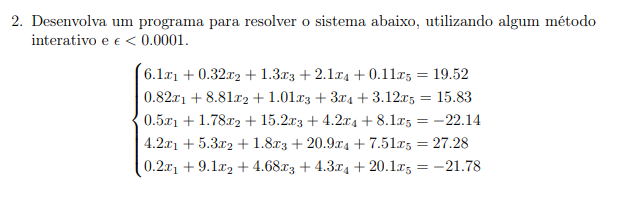

In [ ]:
import numpy as np

A = np.array([[6.1, 0.32, 1.3,2.1,0.11],
              [ 0.82, 8.81, 1.01,3.0,3.12],
              [0.5,1.78,15.2,4.2,8.1],
              [4.2,5.3,1.8,20.9,7.51],
              [0.2,9.1,4.68,4.3,20.1]])
b = np.array([19.52,15.83,-22.14, 27.28, -21.78])

x = np.array([0,0,0,0,0])
x_ant = x.copy()

n = len(A)
H = A.copy()
g = b.copy()
err = 10.0 

for i in range(n): 
    H[i] = -A[i]/A[i][i]
    g[i] = b[i]/A[i,i]
    
H = H + np.identity(5) 
print (H)

[[ 0.         -0.05245902 -0.21311475 -0.3442623  -0.01803279]
 [-0.09307605  0.         -0.11464245 -0.34052213 -0.35414302]
 [-0.03289474 -0.11710526  0.         -0.27631579 -0.53289474]
 [-0.20095694 -0.25358852 -0.0861244   0.         -0.35933014]
 [-0.00995025 -0.45273632 -0.23283582 -0.21393035  0.        ]]


In [ ]:
while err>0.0001:
    x = np.dot(H,x)+g  
    err = abs(max(x-x_ant)/max(x)) 
    x_ant = x

print("A solução do sistema é:", x)

A solução do sistema é: [ 2.99987797  1.99982962 -1.00018433  0.99983449 -2.00017641]


####Exercício 3
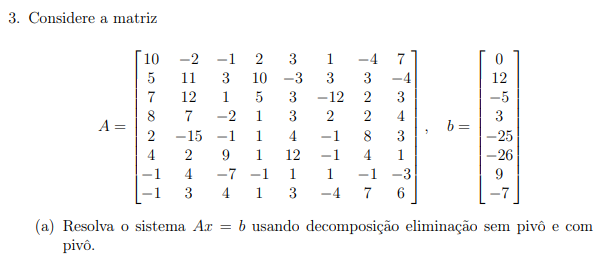

#####NÃO SEI SE FAZ SENTIDO PQ DAI A B NÂO FAZ
talvez um deles não vai como float, dai da diferente

Sem pivotamento:

In [ ]:
import numpy as np

def fatora_LU(A):
    n = len(A)
    U = np.zeros((n,n))# tamanho da matriz de zeros, ja que n=m nos nossos estudos
    L = np.identity(n)
    for m in range(n):
        for j in range(m,n):
            U[m,j] = A[m,j] - np.sum(L[m, 0:m]*U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m]-np.sum(L[i, 0:m]*U[0:m, m]))/U[m,m]
    return L, U

In [ ]:
A=np.array([[10,-2,-1,2,3,1,-4,7],
            [5,11,3,10,-3,3,3,-4],
            [7,12,1,5,3,-12,2,3],
            [8,7,-2,1,3,2,2,4],
            [2,-15,-1,1,4,-1,8,3],
            [4,2,9,1,12,-1,4,1],
            [-1,4,-7,-1,1,1,-1,-3],
            [-1,3,4,1,3,-4,7,6]], float)
L,U=fatora_LU(A)
print("A=", A)
print("L=", L)
print("U=",U)

A= [[ 10.  -2.  -1.   2.   3.   1.  -4.   7.]
 [  5.  11.   3.  10.  -3.   3.   3.  -4.]
 [  7.  12.   1.   5.   3. -12.   2.   3.]
 [  8.   7.  -2.   1.   3.   2.   2.   4.]
 [  2. -15.  -1.   1.   4.  -1.   8.   3.]
 [  4.   2.   9.   1.  12.  -1.   4.   1.]
 [ -1.   4.  -7.  -1.   1.   1.  -1.  -3.]
 [ -1.   3.   4.   1.   3.  -4.   7.   6.]]
L= [[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.5         1.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.7         1.11666667  1.          0.          0.          0.
   0.          0.        ]
 [ 0.8         0.71666667  1.67924528  1.          0.          0.
   0.          0.        ]
 [ 0.2        -1.21666667 -1.56603774  0.38323353  1.          0.
   0.          0.        ]
 [ 0.4         0.23333333 -3.88679245 -7.13273453 -0.92194357  1.
   0.          0.        ]
 [-0.1         0.31666667  3.71698113  5.3752495   1.42633229 -0.36753716
   1.          0.

In [ ]:
B=np.array([0,12,-5,3,-25,-26,9,-7],float)
y = solve_L(L,B)
#print(y)
x = solve_U(U, y)
print(x)

[-1.  1. -1.  1. -1.  1. -1.  1.]


Com pivotamento

In [ ]:
import numpy as np
from numpy import dot
def gaussElimin(a,b): 
    n = len(b) 
    for k in range(0,n-1): 
        for i in range(k+1,n): 
            if a[i][k] != 0.0: 
                lam = a [i][k]/a[k][k] 
                a[i][k+1:n] = a[i][k+1:n] - lam*a[k][k+1:n] 
                b[i] = b[i] - lam*b[k] 
    for k in range(n-1,-1,-1): 
        b[k] = (b[k] - dot(a[k][k+1:n],b[k+1:n]))/a[k][k] 
    return b

In [ ]:
A=np.array([[10,-2,-1,2,3,1,-4,7],
            [5,11,3,10,-3,3,3,-4],
            [7,12,1,5,3,-12,2,3],
            [8,7,-2,1,3,2,2,4],
            [2,-15,-1,1,4,-1,8,3],
            [4,2,9,1,12,-1,4,1],
            [-1,4,-7,-1,1,1,-1,-3],
            [-1,3,4,1,3,-4,7,6]], float)
B=np.array([0,12,-5,3,-25,-26,9,-7],float)
print (gaussElimin(A,B))

[-1.  1. -1.  1. -1.  1. -1.  1.]


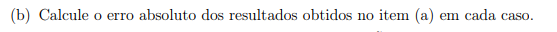

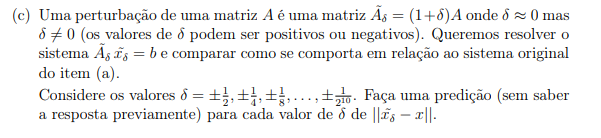

Vamos calcular as soluções perturbadas $x_{\delta}$ para cada valor de $\delta$ no enunciado.

In [ ]:
import numpy as np
from numpy import dot
def gaussElimin(a,b): 
    n = len(b) 
    for k in range(0,n-1): 
        for i in range(k+1,n): 
            if a[i][k] != 0.0: 
                lam = a [i][k]/a[k][k] 
                a[i][k+1:n] = a[i][k+1:n] - lam*a[k][k+1:n] 
                b[i] = b[i] - lam*b[k] 
    for k in range(n-1,-1,-1): 
        b[k] = (b[k] - dot(a[k][k+1:n],b[k+1:n]))/a[k][k] 
    return b
A=np.array([[10,-2,-1,2,3,1,-4,7],
            [5,11,3,10,-3,3,3,-4],
            [7,12,1,5,3,-12,2,3],
            [8,7,-2,1,3,2,2,4],
            [2,-15,-1,1,4,-1,8,3],
            [4,2,9,1,12,-1,4,1],
            [-1,4,-7,-1,1,1,-1,-3],
            [-1,3,4,1,3,-4,7,6]], float)

B=np.array([0,12,-5,3,-25,-26,9,-7],float)

for k in range(1,11):
  d=(0.5)**k
  e=1+d
  C = A*e
  print(k, gaussElimin(C,B))


1 [-0.66666667  0.66666667 -0.66666667  0.66666667 -0.66666667  0.66666667
 -0.66666667  0.66666667]
2 [ 0.05038243  0.05246749  0.10563198 -0.13632306 -0.07485068  0.07518289
  0.09705749 -0.00233507]
3 [-0.03085688 -0.00045133 -0.01117426  0.04507196  0.02833765 -0.00348545
 -0.02649296  0.00909043]
4 [ 0.01061767  0.00060509  0.00389573 -0.01483171 -0.00861243  0.00017946
  0.01028606 -0.00480673]
5 [-3.55375658e-03 -2.58969517e-04 -1.51711585e-03  5.16046159e-03
  2.99997404e-03 -9.25241518e-05 -3.54411305e-03  1.48480912e-03]
6 [ 1.26138870e-03  8.47772593e-05  5.31842331e-04 -1.82035994e-03
 -1.05434296e-03  4.14248451e-05  1.23740671e-03 -5.28517544e-04]
7 [-4.46583971e-04 -3.07361754e-05 -1.87464854e-04  6.45342811e-04
  3.74033227e-04 -1.49534715e-05 -4.39964896e-04  1.87260226e-04]
8 [ 1.59146677e-04  1.08949089e-05  6.68435350e-05 -2.29873781e-04
 -1.33295243e-04  5.18694177e-06  1.56606670e-04 -6.66866690e-05]
9 [-5.67896110e-05 -3.88878895e-06 -2.38481165e-05  8.20301487e-

####EXERCICIO 4 

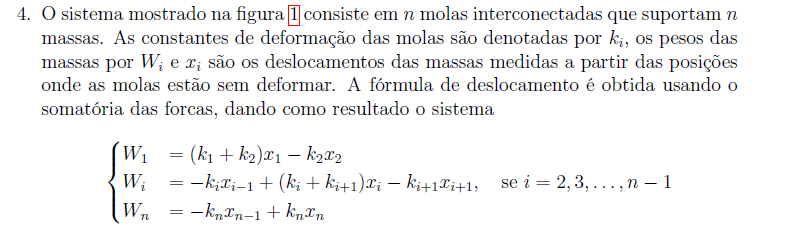

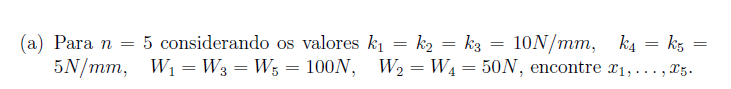

In [ ]:
#colocando o sistema na forma matricial temos um sistema do tipo Ax=B assim
import numpy as np
A = np.array([[20.0,-10.0,0,0,0],[-10.0,20.0,-10.0,0,0],[0,-10.0,15.0,-5.0,0],[0,0,-5.0,10.0,-5.0],[0,0,0,-5.0,5.0]])
print("A matrix A é", A)
B = np.array([100.0,50.0,100.0,50.0,100.0])
print("O vetor B é", B)

z = np.linalg.solve(A,B)
print("A soluçao do sistema é", z)

A matrix A é [[ 20. -10.   0.   0.   0.]
 [-10.  20. -10.   0.   0.]
 [  0. -10.  15.  -5.   0.]
 [  0.   0.  -5.  10.  -5.]
 [  0.   0.   0.  -5.   5.]]
O vetor B é [100.  50. 100.  50. 100.]
A soluçao do sistema é [ 40.  70.  95. 125. 145.]


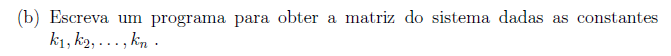

In [ ]:
n = 6 #fixado algum n
ki = 2  #k_i
kimais1 = 3 #k_(i+1)
kimenos1 = 5 #k_(i-1)
a = [[0] * n for i in range(n)]
for i in range(n):
    for j in range(i-2, i-1):
        a[i][j] = 0
    for j in range(i-1, i):
        a[i][j] = -ki
    for j in range (i,i+1):
        a[i][j] = kimenos1+ki
    for j in range (i+1,n):
        a[i][j] = -kimais1
    for j in range (i+2,n):
        a[i][j] = 0
for row in a:
    print(' '.join([str(elem) for elem in row]))

7 -3 0 0 0 0
-2 7 -3 0 0 0
0 -2 7 -3 0 0
0 0 -2 7 -3 0
0 0 0 -2 7 -3
0 0 0 0 -2 7




```
# Isto está formatado como código
```

####EXERCICIO 5
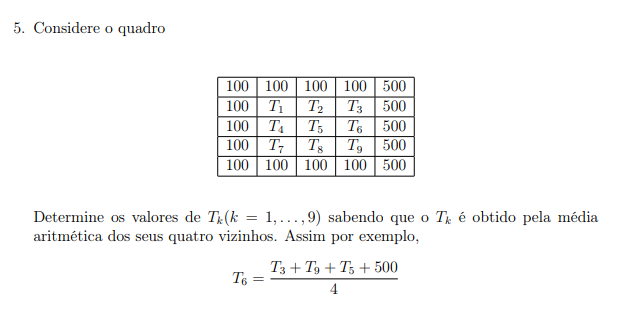

Observe que teremos as seguintes equações:

$$T_1=\dfrac{2\times100+T_2+T_4}{4}$$

$$T_2=\dfrac{100+T_1+T_3+T_5}{4}$$

$$T_3=\dfrac{100+500+T_2+T_6}{4}$$

$$T_4=\dfrac{100+T_1+T_5+T_7}{4}$$

$$T_5=\dfrac{T_2+T_4+T_6+T_8}{4}$$

$$T_6=\dfrac{500+T_3+T_5+T_9}{4}$$

$$T_7=\dfrac{2\times 100+T_4+T_8}{4}$$

$$T_8=\dfrac{100+T_5+T_7+T_9}{4}$$

$$T_9=\dfrac{100+500+T_6+T_8}{4}$$


Dessa forma teremos um sistema do tipo $Ax=b$, onde 

$A=\begin{pmatrix}
4&-1&0&-1&0&0&0&0&0\\
-1&4&-1&0&-1&0&0&0&0\\
0&-1&4&0&0&-1&0&0&0\\
-1&0&0&4&-1&0&-1&0&0\\
0&-1&0&-1&4&-1&0&-1&0\\
0&0&-1&0&-1&4&0&0&-1\\
0&0&0&-1&0&0&4&-1&0\\
0&0&0&0&-1&0&-1&4&-1\\
0&0&0&0&0&-1&0&-1&4

\end{pmatrix}$ e $b=\begin{pmatrix}
200\\
100\\
600\\
100\\
0\\
500\\
200\\
100\\
600
\end{pmatrix}$

In [ ]:
import numpy as np

def fatora_LU(A):
    n = len(A)
    U = np.zeros((n,n))# tamanho da matriz de zeros, ja que n=m nos nossos estudos
    L = np.identity(n)
    for m in range(n):
        for j in range(m,n):
            U[m,j] = A[m,j] - np.sum(L[m, 0:m]*U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m]-np.sum(L[i, 0:m]*U[0:m, m]))/U[m,m]
    return L, U
  

In [ ]:
A=np.array([[4,-1,0,-1,0,0,0,0,0],
            [-1,4,-1,0,-1,0,0,0,0],
            [0,-1,4,0,0,-1,0,0,0],
            [-1,0,0,4,-1,0,-1,0,0],
            [0,-1,0,-1,4,-1,0,-1,0],
            [0,0,-1,0,-1,4,0,0,-1],
            [0,0,0,-1,0,0,4,-1,0],
            [0,0,0,0,-1,0,-1,4,-1],
            [0,0,0,0,0,-1,0,-1,4]], float)
L,U=fatora_LU(A)


In [ ]:

B=np.array([200,100,600,100,0,500,200,100,600])
y = solve_L(L,B)


In [ ]:
x = solve_U(U, y)
print("Os valores de cada T_i são:", x, "e")

Os valores de cada T_i são: [128 174 270 138 198 309 128 174 270] e
